In [1]:
import torchaudio as ta
import torch
from IPython.display import Audio # doesn't work alone in jupyter notebook in 
# from playsound import playsound doesn't work either
import matplotlib.pyplot as plt
import librosa
import numpy as np

# Basics

#### Functions

In [2]:
def _plot(waveform, sample_rate, title):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  time_axis = torch.arange(0, num_frames) / sample_rate

  figure, axes = plt.subplots(num_channels, 1)
  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels):
    if title == "Waveform":
      axes[c].plot(time_axis, waveform[c], linewidth=1)
      axes[c].grid(True)
    else:
      axes[c].specgram(waveform[c], Fs=sample_rate)
    if num_channels > 1:
      axes[c].set_ylabel(f'Channel {c+1}')
  figure.suptitle(title)
  plt.show(block=False)

def plot_waveform(waveform, sample_rate, title = "Waveform"):
  _plot(waveform, sample_rate, title=title)

def plot_spectrogram(waveform, sample_rate, title = "Spectrogram"):
  _plot(waveform, sample_rate, title=title)
     


In [3]:
sample_wav_url = "https://pytorch-tutorial-assets.s3.amazonaws.com/steam-train-whistle-daniel_simon.wav"
# I tried to do this with an mp3 but it doesn't work

In [4]:
SPEECH_WAVEFORM, SAMPLE_RATE  =  ta.load(sample_wav_url)

In [5]:
SPEECH_WAVEFORM[0]

tensor([0.0027, 0.0063, 0.0092,  ..., 0.0032, 0.0047, 0.0052])

In [6]:
SAMPLE_RATE

44100

In [7]:
Audio(sample_wav_url)

In [19]:
Audio(SPEECH_WAVEFORM, rate = SAMPLE_RATE) # Loading a different way

## Transformation

In [8]:
from torchaudio import transforms as T 
from torchaudio import functional as F 

In [ ]:
plot_waveform(SPEECH_WAVEFORM, SAMPLE_RATE, title="Waveform")

In [ ]:
plot_spectrogram(SPEECH_WAVEFORM, title = "Spectorgram_og", sample_rate = SAMPLE_RATE)

In [72]:
resample_rate = 16000

In [73]:
transformer = T.Resample(SAMPLE_RATE, resample_rate, dtype = SPEECH_WAVEFORM.dtype) # Acts kind of like a function call

In [74]:
functional_audio = F.resample(SPEECH_WAVEFORM, resample_rate, SAMPLE_RATE) # Direct

In [1]:
transformer_audio = transformer(SPEECH_WAVEFORM)

NameError: name 'transformer' is not defined

In [1]:
transformer_audio.shape

NameError: name 'transformer_audio' is not defined

In [77]:
Audio(transformer_audio, rate = resample_rate)

In [78]:
Audio(functional_audio, rate = resample_rate)

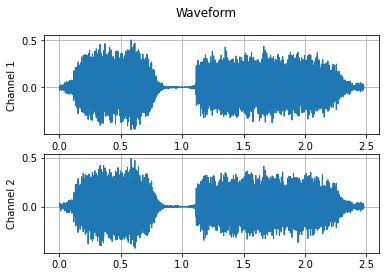

In [79]:
plot_waveform(transformer_audio, sample_rate = resample_rate)

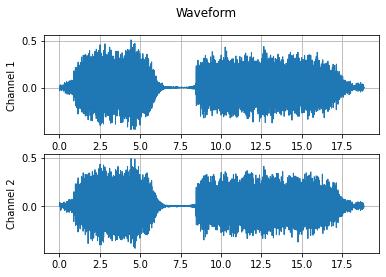

In [80]:
plot_waveform(functional_audio, resample_rate)

# 

### Recording Audio

In [12]:
import sounddevice as sd
from scipy.io.wavfile import write

fs = 44100  # Sample rate
seconds = 3  # Duration of recording

myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
sd.wait()  # Wait until recording is finished
write('output1.wav', fs, myrecording)  # Save as WAV file 

In [15]:
myrecording.shape

(132300, 2)

In [16]:
!pip install ipywebrtc

     |████████████████████████████████| 260 kB 2.6 MB/s eta 0:00:01
